<a href="https://colab.research.google.com/github/anthony4582/full_fred/blob/master/Inflation_Correlations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
!pip install fredapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as px
import seaborn as sns

plt.style.use('fivethirtyeight')
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

import fredapi
from fredapi import Fred

In [37]:
fred_api_key = 'cc29855e406e7982de8fa1b2bbd1043a' #my api key
fred = Fred(api_key = fred_api_key) #the call mechanism within the fredapi module

In [38]:
inflation = fred.get_series(series_id='T5YIFRM') #the call mechanism within the fredapi module

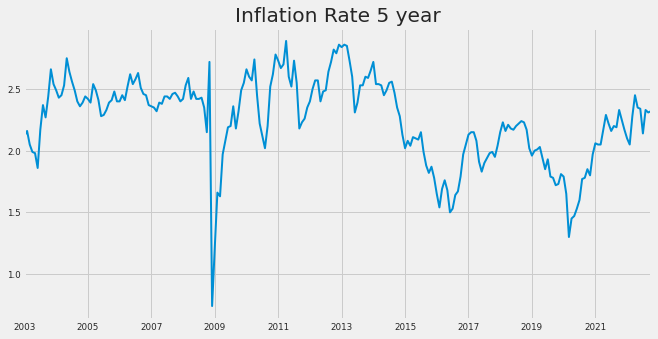

In [39]:
inflation.plot(figsize=(10,5), title="Inflation Rate 5 year", lw=2)

In [40]:
Infl = pd.DataFrame(inflation)
Infl.columns = ['InflRate']
Infl['InflRate'] = Infl['InflRate'] 
IF = Infl.loc[Infl.index >= '2021-01-01']
IF

,InflRate
2021-01-01,2.06
2021-02-01,2.05
2021-03-01,2.05
2021-04-01,2.17
2021-05-01,2.29
2021-06-01,2.22
2021-07-01,2.16
2021-08-01,2.20
2021-09-01,2.19
2021-10-01,2.33


In [41]:
from google.colab import files
uploaded = files.upload()
import io
new_donor_gifts = pd.read_csv(io.BytesIO(uploaded['New_Donor_Gift_Counts_2015-Pres.txt']), sep='\t')
new_donor_gifts['Date']=pd.to_datetime(new_donor_gifts[['Year','Month','Day']])
ndg = new_donor_gifts[['Date', 'New_Donor_Gift_Counts']]

ndg.info()

Saving New_Donor_Gift_Counts_2015-Pres.txt to New_Donor_Gift_Counts_2015-Pres (2).txt
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   94 non-null     datetime64[ns]
 1   New_Donor_Gift_Counts  94 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


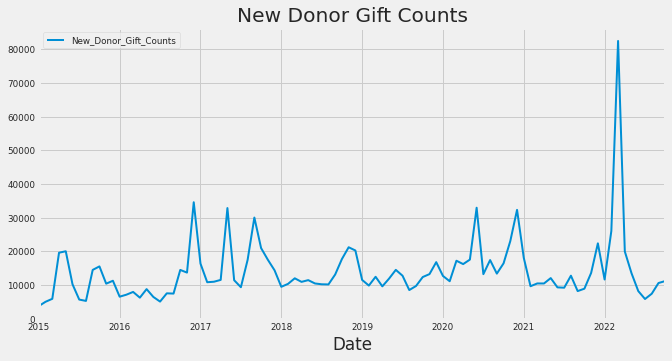

In [42]:
ndg.plot(x = 'Date', y='New_Donor_Gift_Counts', figsize=(10,5), title="New Donor Gift Counts", lw=2)

In [43]:
lags = [3,6,9,12,15,18]

lagged_inflation = IF.assign(**{f'{col} (t-{lag})': IF['InflRate'].shift(lag) 
for lag in lags
for col in IF}) #dictionary comprehension with f string

print(lagged_inflation.tail(25))
lagged_inflation.info()

            InflRate  InflRate (t-3)  InflRate (t-6)  InflRate (t-9)  \
2021-01-01      2.06             NaN             NaN             NaN   
2021-02-01      2.05             NaN             NaN             NaN   
2021-03-01      2.05             NaN             NaN             NaN   
2021-04-01      2.17            2.06             NaN             NaN   
2021-05-01      2.29            2.05             NaN             NaN   
2021-06-01      2.22            2.05             NaN             NaN   
2021-07-01      2.16            2.17            2.06             NaN   
2021-08-01      2.20            2.29            2.05             NaN   
2021-09-01      2.19            2.22            2.05             NaN   
2021-10-01      2.33            2.16            2.17            2.06   
2021-11-01      2.25            2.20            2.29            2.05   
2021-12-01      2.17            2.19            2.22            2.05   
2022-01-01      2.10            2.33            2.16            

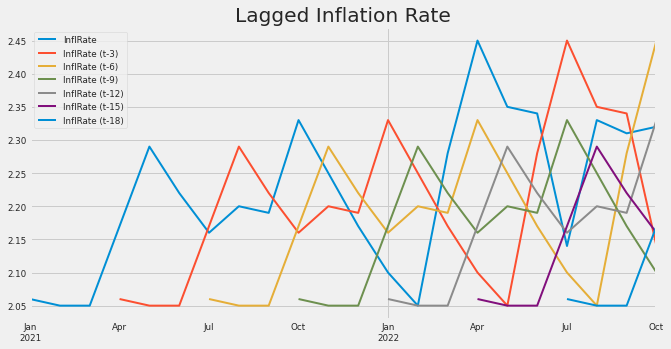

In [44]:
lagged_inflation.plot(figsize=(10,5), title="Lagged Inflation Rate", lw=2)

In [45]:
lagged_inflation['Date'] = lagged_inflation.index
lagged_inflation.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22 entries, 2021-01-01 to 2022-10-01
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   InflRate         22 non-null     float64       
 1   InflRate (t-3)   19 non-null     float64       
 2   InflRate (t-6)   16 non-null     float64       
 3   InflRate (t-9)   13 non-null     float64       
 4   InflRate (t-12)  10 non-null     float64       
 5   InflRate (t-15)  7 non-null      float64       
 6   InflRate (t-18)  4 non-null      float64       
 7   Date             22 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 1.5 KB


In [46]:
combined_df = lagged_inflation.merge(ndg, on="Date", how="inner")
combined_df

,InflRate,InflRate (t-3),InflRate (t-6),InflRate (t-9),InflRate (t-12),InflRate (t-15),InflRate (t-18),Date,New_Donor_Gift_Counts
0,2.06,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01,18106
1,2.05,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-01,9691
2,2.05,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-01,10516
3,2.17,2.06,NaN,NaN,NaN,NaN,NaN,2021-04-01,10508
4,2.29,2.05,NaN,NaN,NaN,NaN,NaN,2021-05-01,12103
5,2.22,2.05,NaN,NaN,NaN,NaN,NaN,2021-06-01,9352
6,2.16,2.17,2.06,NaN,NaN,NaN,NaN,2021-07-01,9253
7,2.20,2.29,2.05,NaN,NaN,NaN,NaN,2021-08-01,12817
8,2.19,2.22,2.05,NaN,NaN,NaN,NaN,2021-09-01,8250
9,2.33,2.16,2.17,2.06,NaN,NaN,NaN,2021-10-01,8963


In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
combined_df[['New_Donor_Gift_Counts']] = scaler.fit_transform(combined_df[['New_Donor_Gift_Counts']])*10
combined_df

,InflRate,InflRate (t-3),InflRate (t-6),InflRate (t-9),InflRate (t-12),InflRate (t-15),InflRate (t-18),Date,New_Donor_Gift_Counts
0,2.06,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01,1.594186
1,2.05,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-01,0.495220
2,2.05,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-01,0.602962
3,2.17,2.06,NaN,NaN,NaN,NaN,NaN,2021-04-01,0.601917
4,2.29,2.05,NaN,NaN,NaN,NaN,NaN,2021-05-01,0.810218
5,2.22,2.05,NaN,NaN,NaN,NaN,NaN,2021-06-01,0.450948
6,2.16,2.17,2.06,NaN,NaN,NaN,NaN,2021-07-01,0.438019
7,2.20,2.29,2.05,NaN,NaN,NaN,NaN,2021-08-01,0.903463
8,2.19,2.22,2.05,NaN,NaN,NaN,NaN,2021-09-01,0.307031
9,2.33,2.16,2.17,2.06,NaN,NaN,NaN,2021-10-01,0.400146


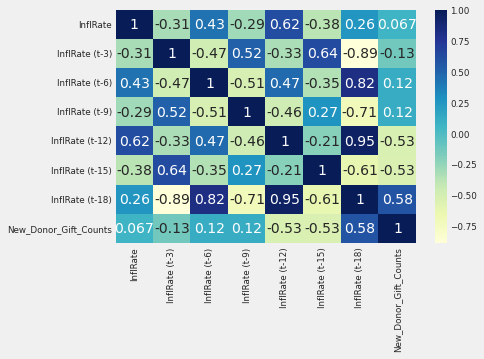

In [48]:
corr = combined_df.corr()

sns.heatmap(corr, cmap='YlGnBu', annot=True)

sns.set(font_scale=0.8)

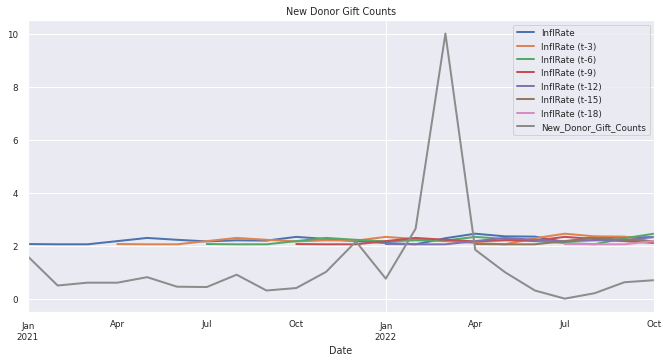

In [49]:
combined_df.plot(x = 'Date',  figsize=(10,5), title="New Donor Gift Counts", lw=2)